# Data Science and Business-Analytics Internship task at The Sparks Foundation  (TSF) 


# Name: Anjali Jha

# Task-1 Student's Marks Prediction using Supervised ML

# Simple Linear Regression: 
***This technique is used as we have just used two variables to perform this task.***

**Importing all the data science library functions and preparing the dataframe for the task**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd #to chck for the directory of the notebook

'C:\\Users\\dell'

In [3]:
data=pd.read_csv("File.csv") #importing dataset and converting csv file into dataframe

# Checking and Pre-processing the data for use

In [4]:
data.head() #to display first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail() #to display the last 5 rows of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.info()        #to summarize the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Collecting Statistical Information of the dataframe

In [7]:
data.describe()     #to summarize the statistical details of the dataframe

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.mean()          #to find the mean on each column of the dataset

Hours      5.012
Scores    51.480
dtype: float64

In [9]:
data.isnull().sum()     #to return the null values in the dataframe

Hours     0
Scores    0
dtype: int64

# Displaying Scatter Plot of Hours v/s Scores 

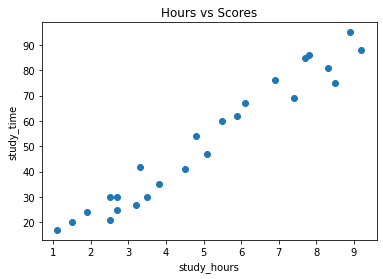

In [10]:
# plotting the dataframe
plt.scatter(x=data.Hours, y=data.Scores)      
plt.xlabel("study_hours")
plt.ylabel("study_time")
plt.title("Hours vs Scores")
plt.show()


# Grid Representation of the dataframe

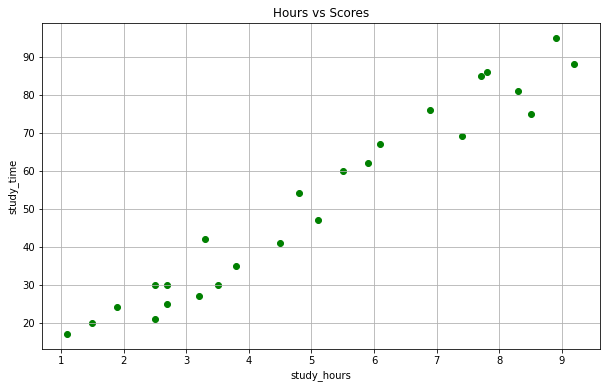

In [11]:
plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(x=data.Hours, y=data.Scores, c="green")
plt.xlabel("study_hours")
plt.ylabel("study_time")
plt.title("Hours vs Scores")
plt.show()

# Heatmap Representation:-
***Heatmap will help to visualize the relationship between the attributes of the dataframe that is Hours and Scores***

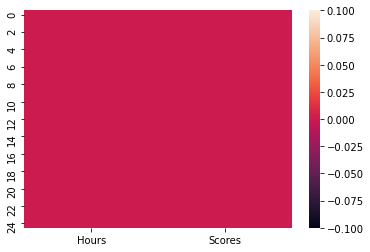

In [12]:
sns.heatmap(data.isnull())

# Splitting the dataset into Features and Label

In [13]:
X=data.iloc[:,0].values
Y=data.iloc[:,1].values

# Splitting the dataset into Training-set and Testing-set

In [14]:
#training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [15]:
print("Shape of X_Train", X_train.shape)
print("Shape of Y_Train", Y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of Y_Test", Y_test.shape)

Shape of X_Train (20,)
Shape of Y_Train (20,)
Shape of X_Test (5,)
Shape of Y_Test (5,)


# Building Prediction Model for predicting the Scores

In [16]:
from sklearn.linear_model import LinearRegression
pred_model= LinearRegression()
pred_model.fit(X.reshape(-1,1), Y)

LinearRegression()

In [17]:
pred_model.coef_

array([9.77580339])

In [18]:
pred_model.intercept_

2.483673405373196

# Plotting the prediction model as Scatter Plot 

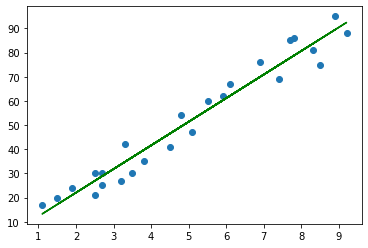

In [19]:
slope= pred_model.coef_*X+pred_model.intercept_
plt.scatter(X,Y)
plt.plot(X, slope, c="green")
plt.show()

# Predicting the values (Scores)

In [20]:
y_pred = pred_model.predict(X_test.reshape(-1,1))
y_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [21]:
print("Actual Values and Predicted Values")
for i in zip(Y_test[:5], y_pred[:5]):
    print(i)

Actual Values and Predicted Values
(20, 17.147378491554402)
(27, 33.766244255893106)
(69, 74.82461849720049)
(30, 26.923181882341876)
(62, 60.16091341101928)


# Grid Representation of Actual Scores v/s Predicted Scores in Scatter Plot

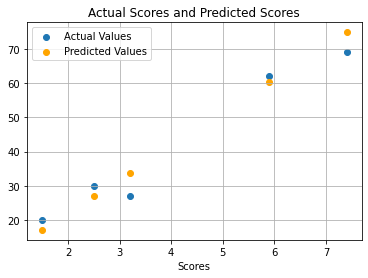

In [22]:
plt.grid()
plt.scatter(X_test, Y_test, label="Actual Values")
plt.scatter(X_test, y_pred, c='orange', label="Predicted Values")
plt.xlabel("Hours")
plt.xlabel("Scores")
plt.title("Actual Scores and Predicted Scores")
plt.legend()
plt.show()

# Checking the Accuracy of the Prediction Model

In [23]:
pred_model.score(X_test.reshape(-1,1), Y_test)

0.9491748734859171

# Calculating Root Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test, y_pred)
rmse=np.sqrt(mse)
print(f"MSE: {mse} \n RMSE: {rmse}")

MSE: 20.1389481299402 
 RMSE: 4.487643939746134


# Predicting Score against 9.25 of Study Hours

In [30]:
print(f"No of study Hours: 9.25 \n", 
      f"Marks Obtained will be: {pred_model.predict([[9.25]])[0]}")


No of study Hours: 9.25 
 Marks Obtained will be: 92.90985477015731
